In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pyfolio as pf

C:\Users\gunsr\anaconda3\envs\investing\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
data = yf.download(tickers = "SPY QQQ GLD IEF TMF", period="10y")

[*********************100%***********************]  5 of 5 completed


In [3]:
df = data.Close.fillna(method="ffill")

In [4]:
spy = df.SPY.copy()

In [5]:
spy_ret = spy.pct_change().iloc[1:]

In [6]:
spy_ret.head()

Date
2012-05-01    0.006220
2012-05-02   -0.002984
2012-05-03   -0.007625
2012-05-04   -0.016158
2012-05-07    0.000730
Name: SPY, dtype: float64

In [7]:
spy_ret.tail()

Date
2022-04-25    0.005798
2022-04-26   -0.028961
2022-04-27    0.002812
2022-04-28    0.025259
2022-04-29   -0.036956
Name: SPY, dtype: float64

In [9]:
print(spy_ret.tz_localize('utc'))

Date
2012-05-01 00:00:00+00:00    0.006220
2012-05-02 00:00:00+00:00   -0.002984
2012-05-03 00:00:00+00:00   -0.007625
2012-05-04 00:00:00+00:00   -0.016158
2012-05-07 00:00:00+00:00    0.000730
                               ...   
2022-04-25 00:00:00+00:00    0.005798
2022-04-26 00:00:00+00:00   -0.028961
2022-04-27 00:00:00+00:00    0.002812
2022-04-28 00:00:00+00:00    0.025259
2022-04-29 00:00:00+00:00   -0.036956
Name: SPY, Length: 2517, dtype: float64


In [10]:
spy_ret.index = pd.to_datetime(spy_ret.index).tz_localize('UTC')

In [11]:
spy_ret.index

DatetimeIndex(['2012-05-01 00:00:00+00:00', '2012-05-02 00:00:00+00:00',
               '2012-05-03 00:00:00+00:00', '2012-05-04 00:00:00+00:00',
               '2012-05-07 00:00:00+00:00', '2012-05-08 00:00:00+00:00',
               '2012-05-09 00:00:00+00:00', '2012-05-10 00:00:00+00:00',
               '2012-05-11 00:00:00+00:00', '2012-05-14 00:00:00+00:00',
               ...
               '2022-04-18 00:00:00+00:00', '2022-04-19 00:00:00+00:00',
               '2022-04-20 00:00:00+00:00', '2022-04-21 00:00:00+00:00',
               '2022-04-22 00:00:00+00:00', '2022-04-25 00:00:00+00:00',
               '2022-04-26 00:00:00+00:00', '2022-04-27 00:00:00+00:00',
               '2022-04-28 00:00:00+00:00', '2022-04-29 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=2517, freq=None)

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.10,2020-02-19,2020-03-23,2020-08-18,130
1,20.18,2018-09-20,2018-12-24,2019-04-29,158
2,14.35,2015-05-21,2016-02-11,2016-07-12,299
3,13.76,2022-01-03,2022-04-29,NaT,NaN
4,10.16,2018-01-26,2018-04-02,2018-08-24,151


C:\Users\gunsr\anaconda3\envs\investing\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


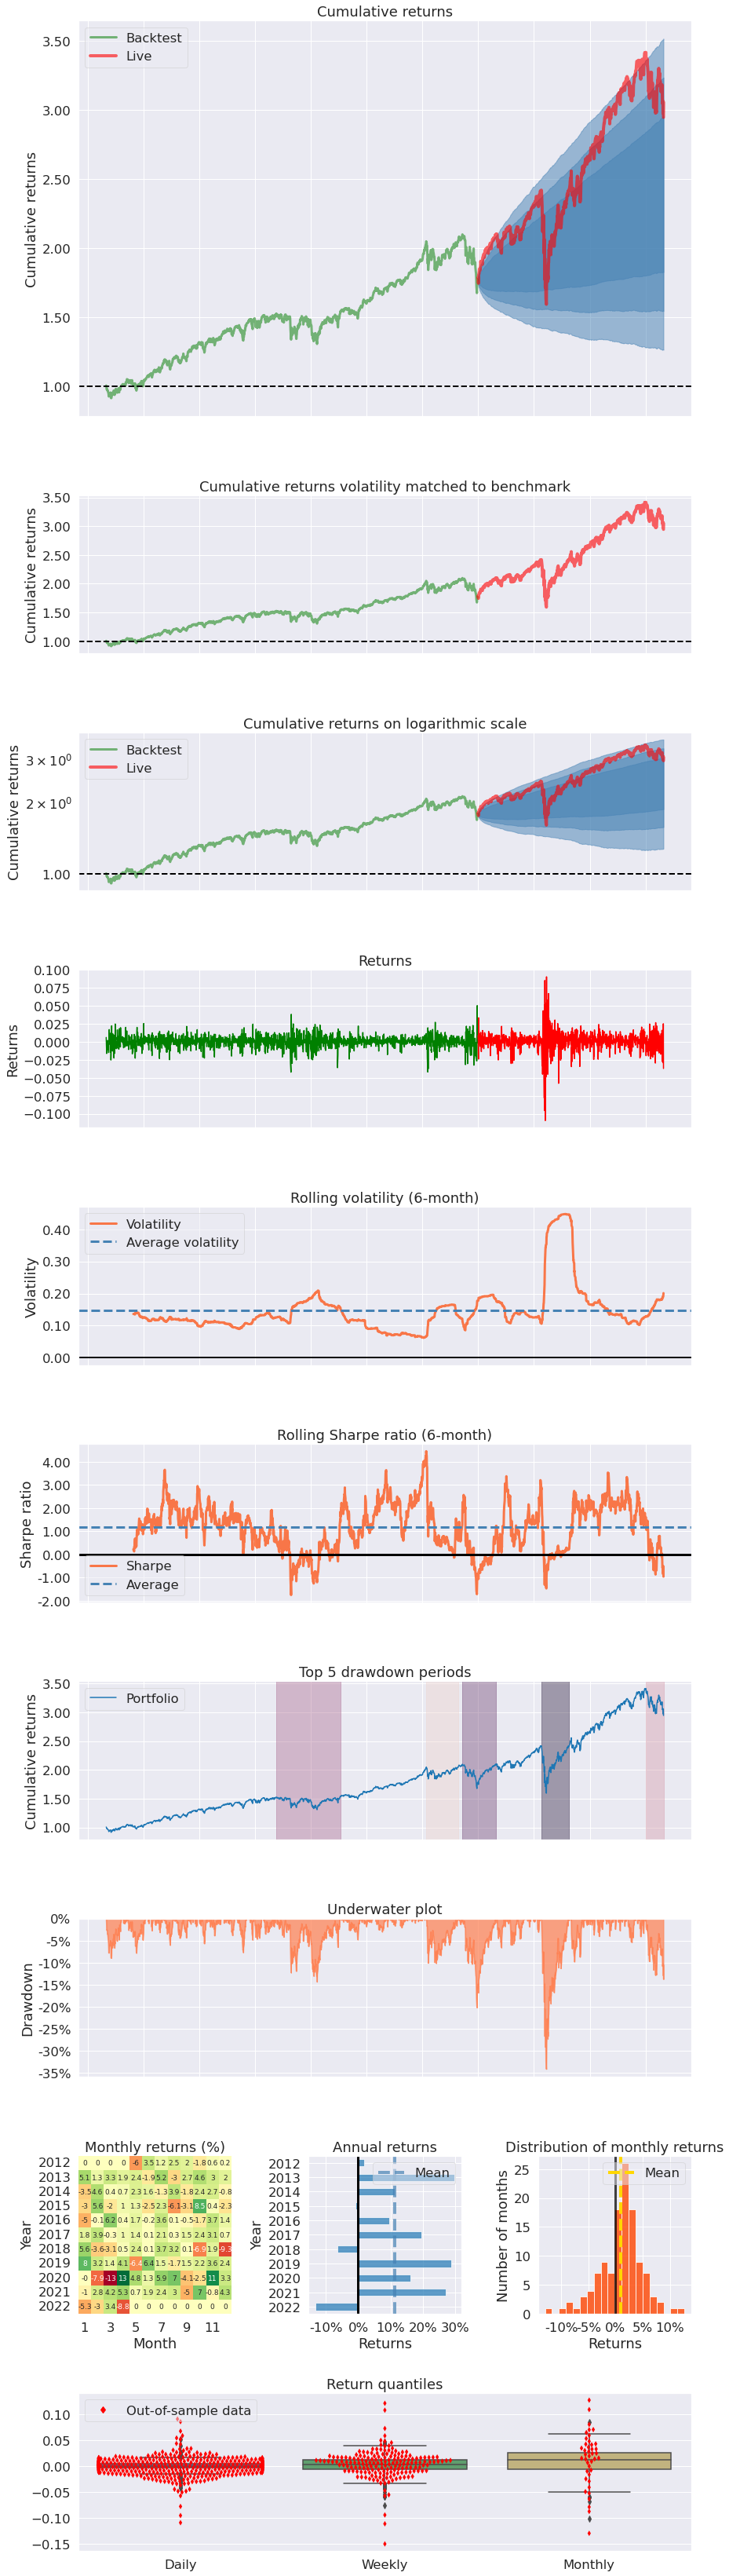

In [12]:
pf.create_returns_tear_sheet(spy_ret, live_start_date="2018-12-31")

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.10,2020-02-19,2020-03-23,2020-08-18,130
1,20.18,2018-09-20,2018-12-24,2019-04-29,158
2,14.35,2015-05-21,2016-02-11,2016-07-12,299
3,13.76,2022-01-03,2022-04-29,NaT,NaN
4,10.16,2018-01-26,2018-04-02,2018-08-24,151


C:\Users\gunsr\anaconda3\envs\investing\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gunsr\anaconda3\envs\investing\lib\site-packages\pyfolio\timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


Stress Events,mean,min,max
EZB IR Event,-0.03%,-1.06%,1.52%
Apr14,0.04%,-2.10%,1.08%
Oct14,0.11%,-1.98%,1.98%
Fall2015,-0.26%,-4.21%,3.84%
Recovery,0.01%,-2.52%,2.49%
New Normal,0.05%,-10.94%,9.06%


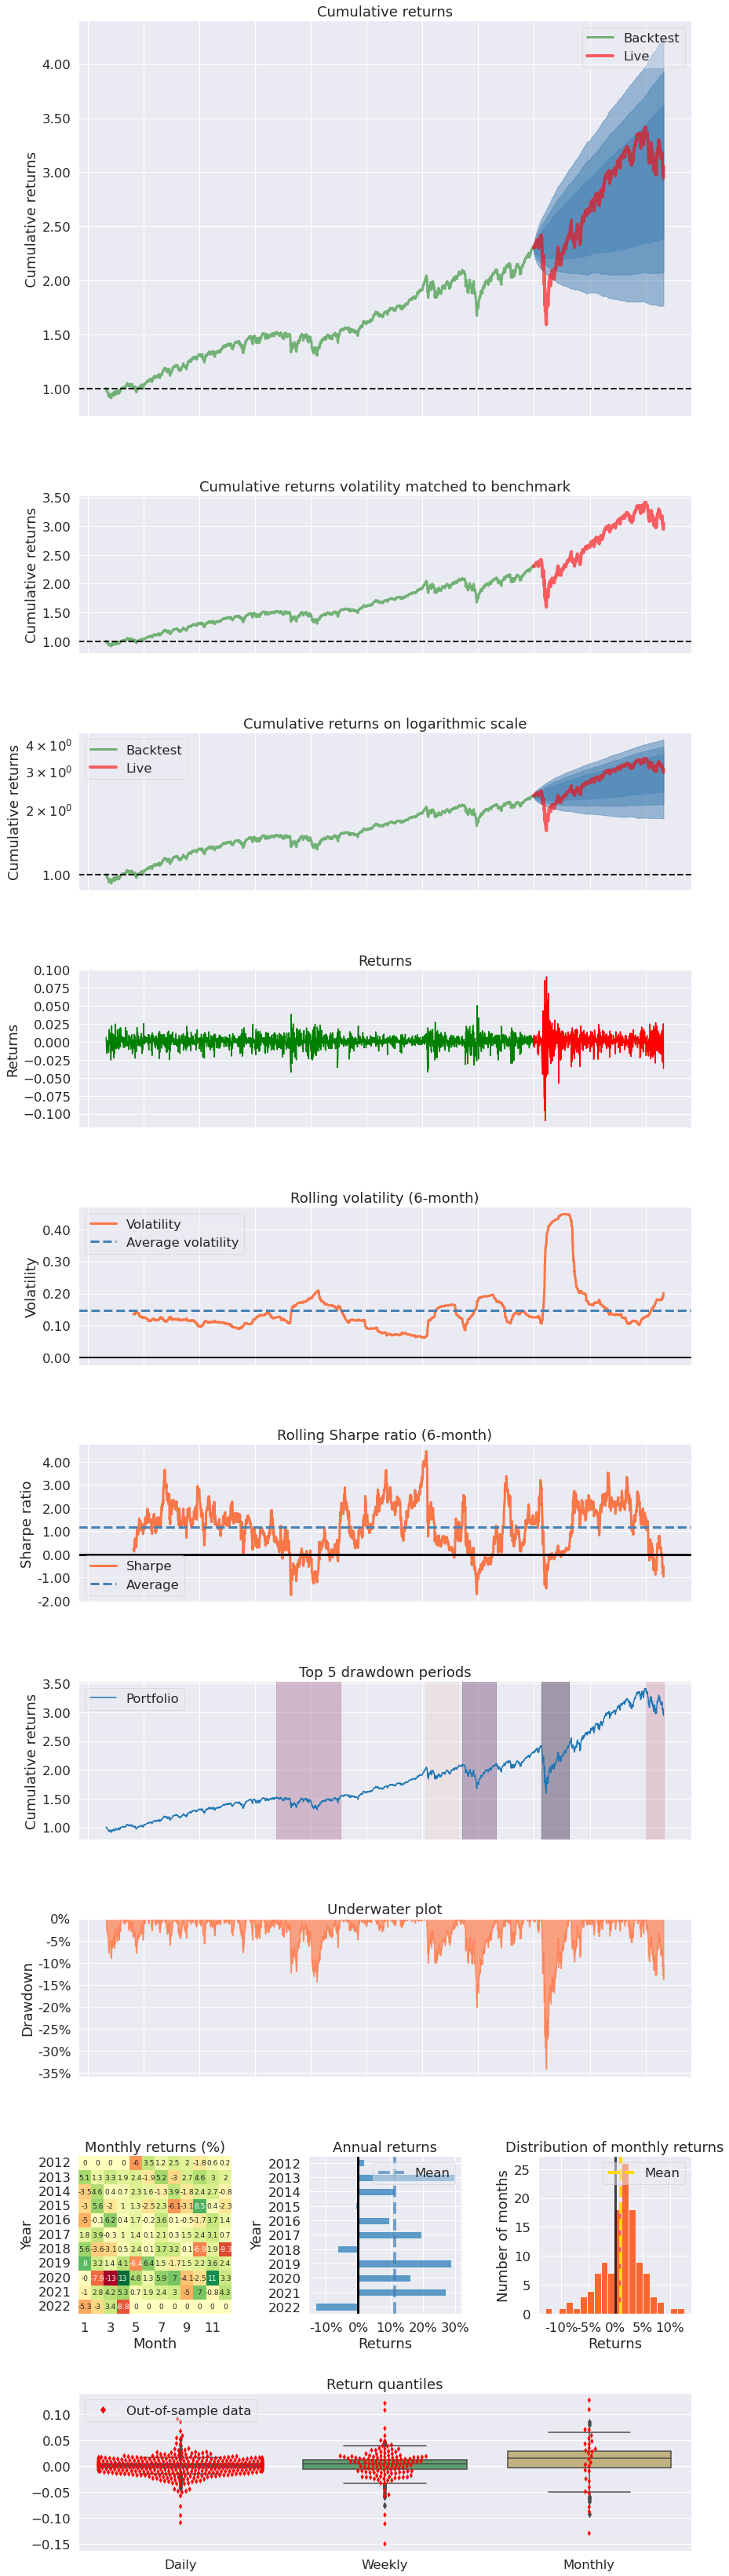

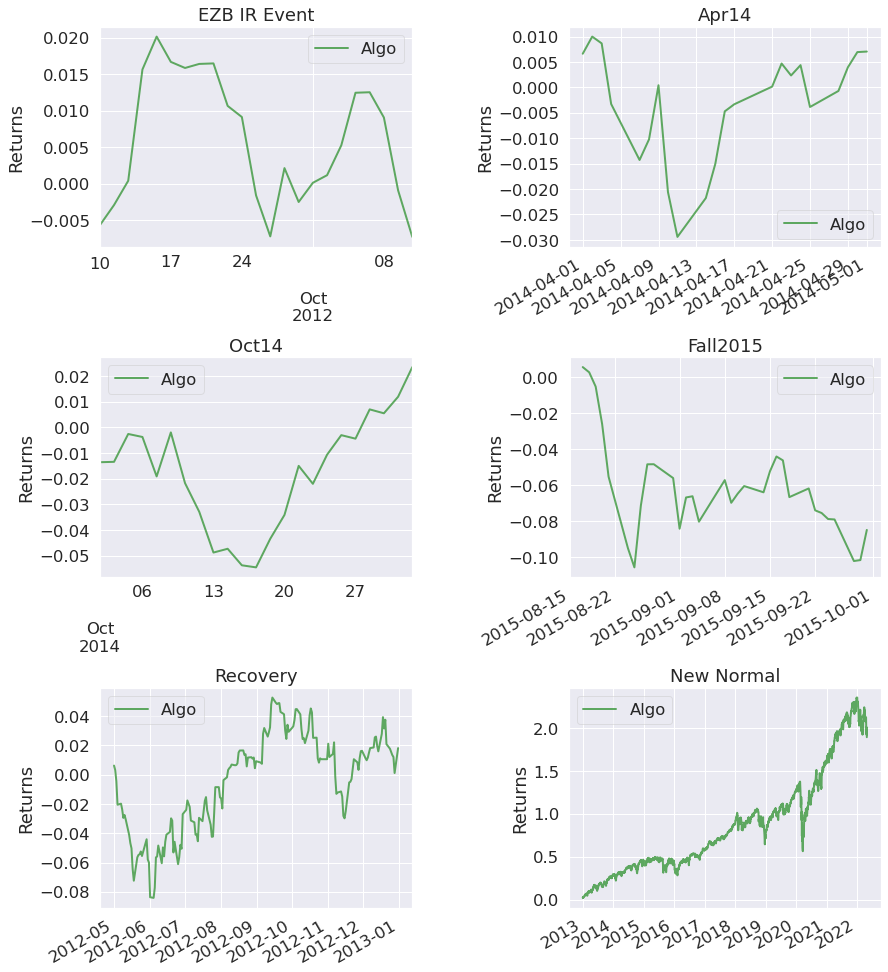

In [13]:
pf.create_full_tear_sheet(spy_ret, live_start_date="2019-12-31")

In [15]:
port = df.loc[:, ['QQQ', 'SPY']].copy()

In [16]:
port_ret = port.pct_change()

In [17]:
initial_amount = 100000

In [19]:
port_ret+1

,QQQ,SPY
Date,,
2012-04-30,NaN,NaN
2012-05-01,1.001648,1.006220
2012-05-02,1.002841,0.997016
2012-05-03,0.989412,0.992375
2012-05-04,0.975132,0.983842
...,...,...
2022-04-25,1.012846,1.005798
2022-04-26,0.962255,0.971039
2022-04-27,0.998802,1.002812


In [20]:
(port_ret+1).cumprod()

,QQQ,SPY
Date,,
2012-04-30,NaN,NaN
2012-05-01,1.001648,1.006220
2012-05-02,1.004494,1.003217
2012-05-03,0.993859,0.995567
2012-05-04,0.969143,0.979481
...,...,...
2022-04-25,4.936788,3.063631
2022-04-26,4.750449,2.974905
2022-04-27,4.744757,2.983270


In [22]:
port_value = (port_ret+1).cumprod()*initial_amount/len(port.columns)

In [23]:
port_value

,QQQ,SPY
Date,,
2012-04-30,NaN,NaN
2012-05-01,50082.385116,50311.006794
2012-05-02,50224.682005,50160.868028
2012-05-03,49692.927165,49778.367363
2012-05-04,48457.156140,48974.049039
...,...,...
2022-04-25,246839.406850,153181.534541
2022-04-26,237522.471915,148745.270833
2022-04-27,237237.866709,149163.510253


In [24]:
port_value['total'] = port_value['QQQ'] + port_value['SPY']
port_value

,QQQ,SPY,total
Date,,,
2012-04-30,NaN,NaN,NaN
2012-05-01,50082.385116,50311.006794,100393.391910
2012-05-02,50224.682005,50160.868028,100385.550033
2012-05-03,49692.927165,49778.367363,99471.294528
2012-05-04,48457.156140,48974.049039,97431.205179
...,...,...,...
2022-04-25,246839.406850,153181.534541,400020.941391
2022-04-26,237522.471915,148745.270833,386267.742748
2022-04-27,237237.866709,149163.510253,386401.376961


In [26]:
port_value.iloc[0] = [initial_amount/len(port.columns), initial_amount/len(port.columns), initial_amount]

In [27]:
port_value.iloc[0]

QQQ       50000.0
SPY       50000.0
total    100000.0
Name: 2012-04-30 00:00:00, dtype: float64

In [28]:
port_value['port_return'] = port_value.total.pct_change()

In [29]:
port_value

,QQQ,SPY,total,port_return
Date,,,,
2012-04-30,50000.000000,50000.000000,100000.000000,NaN
2012-05-01,50082.385116,50311.006794,100393.391910,0.003934
2012-05-02,50224.682005,50160.868028,100385.550033,-0.000078
2012-05-03,49692.927165,49778.367363,99471.294528,-0.009107
2012-05-04,48457.156140,48974.049039,97431.205179,-0.020509
...,...,...,...,...
2022-04-25,246839.406850,153181.534541,400020.941391,0.010135
2022-04-26,237522.471915,148745.270833,386267.742748,-0.034381
2022-04-27,237237.866709,149163.510253,386401.376961,0.000346


In [30]:
port_value.index = pd.to_datetime(port_value.index).tz_localize('UTC')

In [31]:
returns = port_value['port_return']

In [33]:
returns.head()

Date
2012-04-30 00:00:00+00:00         NaN
2012-05-01 00:00:00+00:00    0.003934
2012-05-02 00:00:00+00:00   -0.000078
2012-05-03 00:00:00+00:00   -0.009107
2012-05-04 00:00:00+00:00   -0.020509
Name: port_return, dtype: float64

In [34]:
returns.tail()

Date
2022-04-25 00:00:00+00:00    0.010135
2022-04-26 00:00:00+00:00   -0.034381
2022-04-27 00:00:00+00:00    0.000346
2022-04-28 00:00:00+00:00    0.031557
2022-04-29 00:00:00+00:00   -0.041913
Name: port_return, dtype: float64

In [35]:
positions = port_value.iloc[:, :2]

In [37]:
positions.head()

,QQQ,SPY
Date,,
2012-04-30 00:00:00+00:00,50000.000000,50000.000000
2012-05-01 00:00:00+00:00,50082.385116,50311.006794
2012-05-02 00:00:00+00:00,50224.682005,50160.868028
2012-05-03 00:00:00+00:00,49692.927165,49778.367363
2012-05-04 00:00:00+00:00,48457.156140,48974.049039


In [38]:
positions['cash'] = 0

C:\Users\gunsr\AppData\Local\Temp\ipykernel_17032\3716680580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positions['cash'] = 0


In [39]:
positions.iloc[0] = [0, 0, 100000]

C:\Users\gunsr\anaconda3\envs\investing\lib\site-packages\pandas\core\indexing.py:1797: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


In [40]:
positions.head()

,QQQ,SPY,cash
Date,,,
2012-04-30 00:00:00+00:00,0.000000,0.000000,100000
2012-05-01 00:00:00+00:00,50082.385116,50311.006794,0
2012-05-02 00:00:00+00:00,50224.682005,50160.868028,0
2012-05-03 00:00:00+00:00,49692.927165,49778.367363,0
2012-05-04 00:00:00+00:00,48457.156140,48974.049039,0


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,30.52,2020-02-19,2020-03-23,2020-06-10,81
1,21.64,2018-08-29,2018-12-24,2019-04-22,169
2,19.23,2021-12-27,2022-04-29,NaT,NaN
3,14.78,2015-11-03,2016-02-11,2016-07-18,185
4,12.98,2015-07-20,2015-08-25,2015-11-03,77


C:\Users\gunsr\anaconda3\envs\investing\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gunsr\anaconda3\envs\investing\lib\site-packages\pyfolio\timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


Stress Events,mean,min,max
EZB IR Event,-0.09%,-1.29%,1.44%
Apr14,0.02%,-2.59%,1.39%
Oct14,0.11%,-1.84%,2.31%
Fall2015,-0.25%,-4.02%,4.47%
Recovery,0.00%,-2.59%,2.82%
New Normal,0.06%,-11.56%,8.50%


Top 10 long positions of all time,max
QQQ,64.43%
SPY,52.27%


Top 10 short positions of all time,max


Top 10 positions of all time,max
QQQ,64.43%
SPY,52.27%


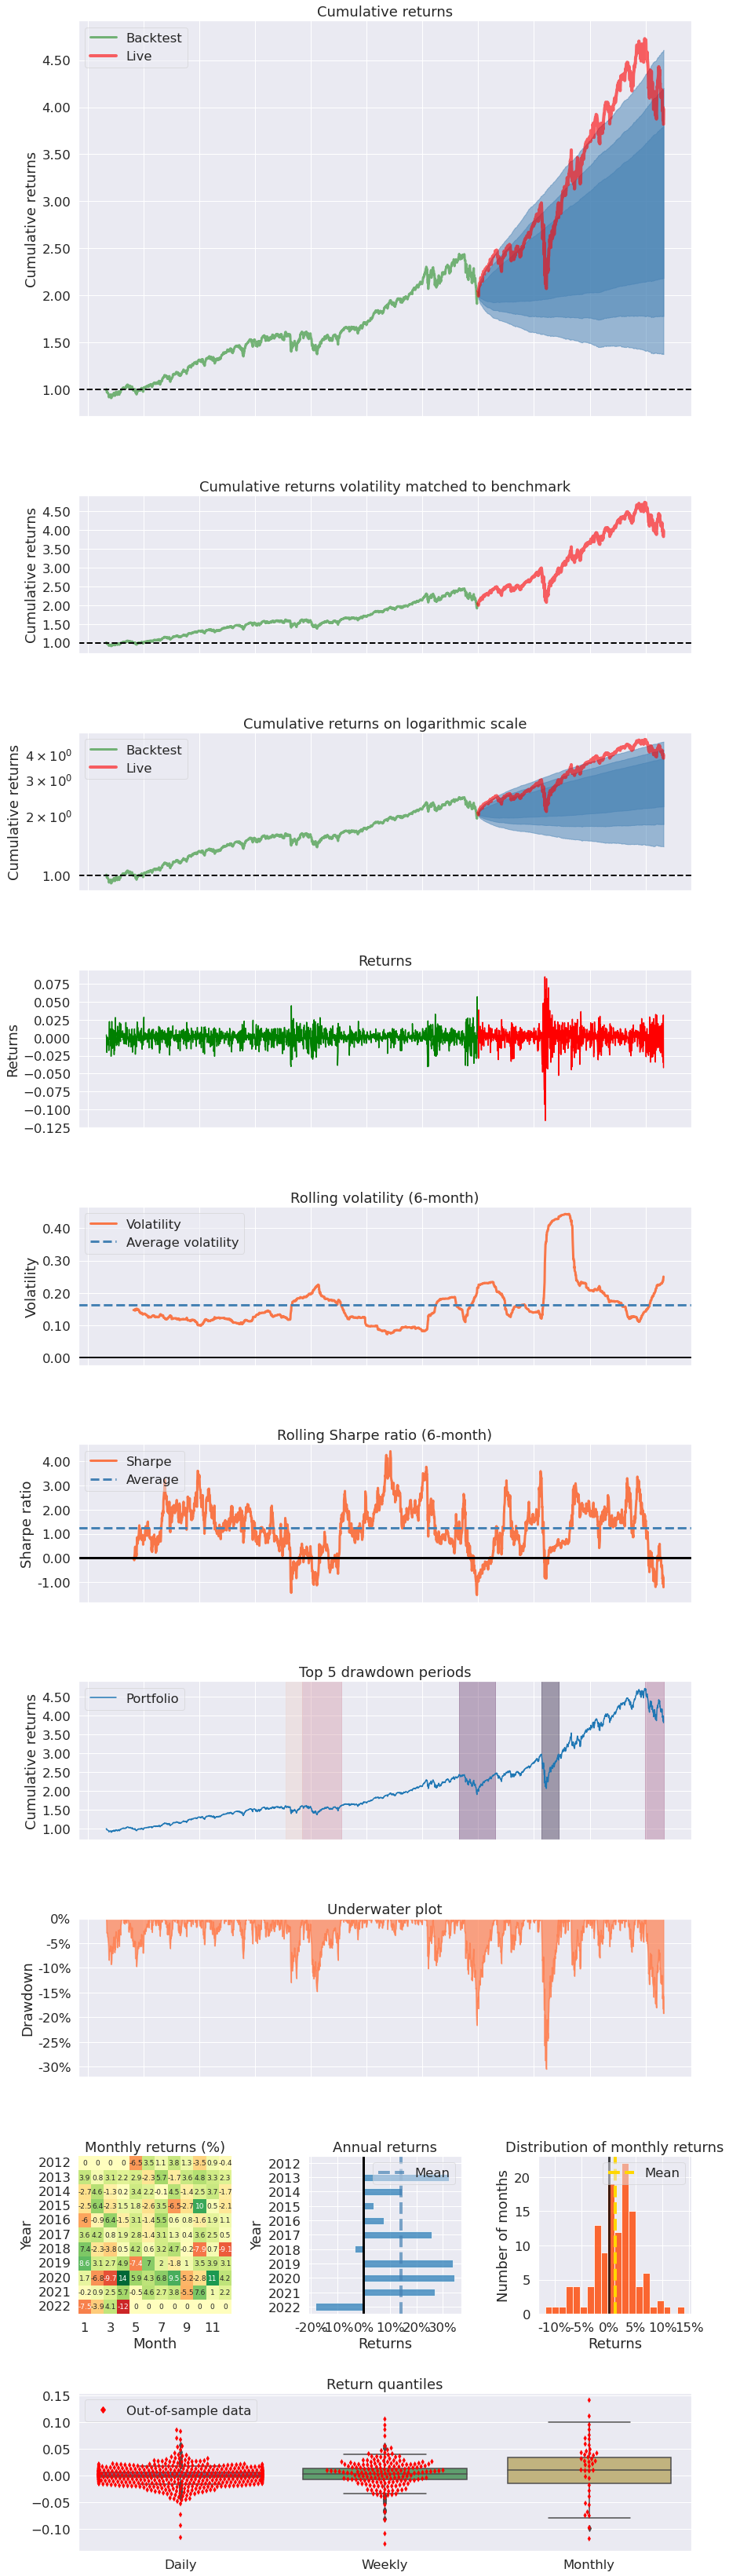

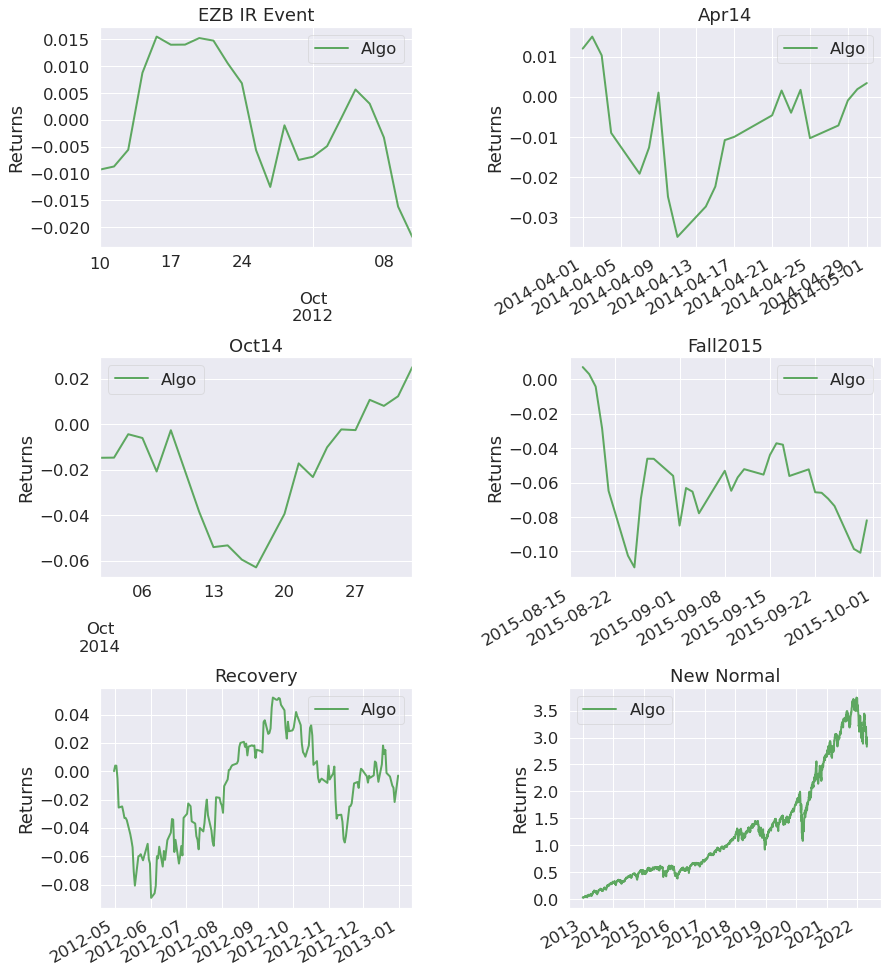

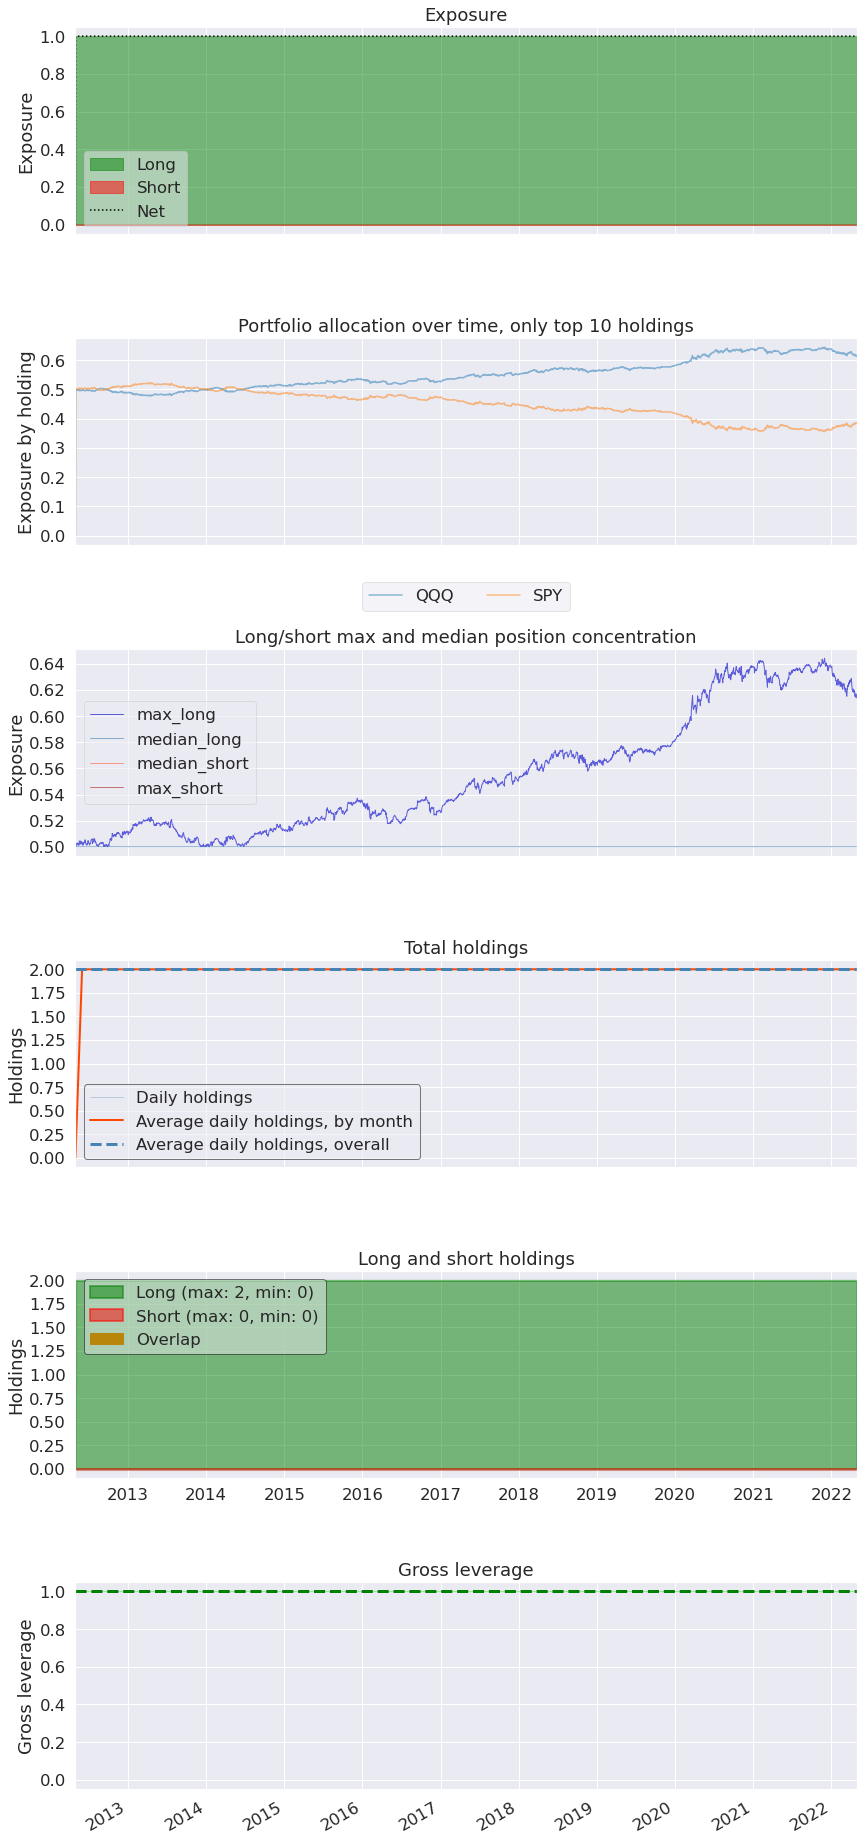

In [44]:
pf.create_full_tear_sheet(returns, 
                            live_start_date='2018-12-31',
                            positions=positions)

In [42]:
help(pf.plotting)

Help on module pyfolio.plotting in pyfolio:

NAME
    pyfolio.plotting

DESCRIPTION
    # Copyright 2018 Quantopian, Inc.
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.

FUNCTIONS
    axes_style(style='darkgrid', rc=None)
        Create pyfolio default axes style context.
        
        Under the hood, calls and returns seaborn.axes_style() with
        some custom settings. Usually you would use in a with-context.
        
        Parameters
    

In [43]:
help(pf.timeseries)

Help on module pyfolio.timeseries in pyfolio:

NAME
    pyfolio.timeseries

DESCRIPTION
    # Copyright 2018 Quantopian, Inc.
    #
    # Licensed under the Apache License, Version 2.0 (the "License");
    # you may not use this file except in compliance with the License.
    # You may obtain a copy of the License at
    #
    #     http://www.apache.org/licenses/LICENSE-2.0
    #
    # Unless required by applicable law or agreed to in writing, software
    # distributed under the License is distributed on an "AS IS" BASIS,
    # WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
    # See the License for the specific language governing permissions and
    # limitations under the License.

FUNCTIONS
    aggregate_returns(returns, convert_to)
        Aggregates returns by week, month, or year.
        
        Parameters
        ----------
        returns : pd.Series
           Daily returns of the strategy, noncumulative.
            - See full explanation in :fun

In [45]:
pf.timeseries.sharpe_ratio(returns)

C:\Users\gunsr\AppData\Local\Temp\ipykernel_17032\2932165370.py:1: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  pf.timeseries.sharpe_ratio(returns)


0.8315280031255867

<AxesSubplot:xlabel='Date'>

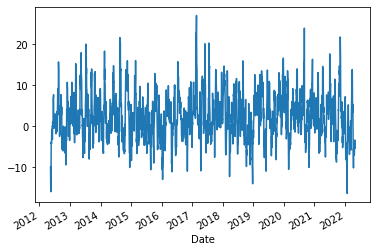

In [48]:
pf.timeseries.rolling_sharpe(returns, 10).plot()

In [46]:
# Show overview of pyfolio.plotting submodule
[f for f in dir(pf.plotting) if 'plot_' in f]

['plot_annual_returns',
 'plot_capacity_sweep',
 'plot_cones',
 'plot_daily_turnover_hist',
 'plot_daily_volume',
 'plot_drawdown_periods',
 'plot_drawdown_underwater',
 'plot_exposures',
 'plot_gross_leverage',
 'plot_holdings',
 'plot_long_short_holdings',
 'plot_max_median_position_concentration',
 'plot_monthly_returns_dist',
 'plot_monthly_returns_heatmap',
 'plot_monthly_returns_timeseries',
 'plot_perf_stats',
 'plot_prob_profit_trade',
 'plot_return_quantiles',
 'plot_returns',
 'plot_rolling_beta',
 'plot_rolling_returns',
 'plot_rolling_sharpe',
 'plot_rolling_volatility',
 'plot_round_trip_lifetimes',
 'plot_sector_allocations',
 'plot_slippage_sensitivity',
 'plot_slippage_sweep',
 'plot_turnover',
 'plot_txn_time_hist',
 'show_and_plot_top_positions']

<AxesSubplot:title={'center':'Top 10 drawdown periods'}, ylabel='Cumulative returns'>

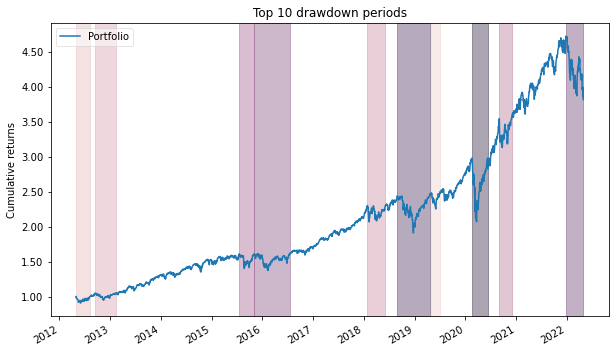

In [49]:
pf.plotting.plot_drawdown_periods(returns, figsize=(10,6))

<AxesSubplot:title={'center':'Monthly returns (%)'}, xlabel='Month', ylabel='Year'>

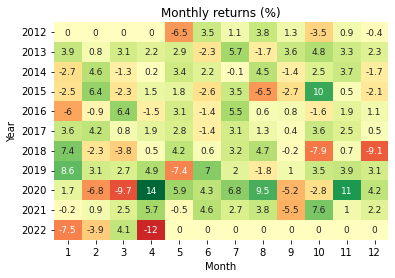

In [50]:
pf.plot_monthly_returns_heatmap(returns)